# 9. Fourier Series and Fourier Transforms

The **Fourier transform** is one of the most important mathematical tools used for analyzing functions.  Given an arbitrary function $f(x)$, with a real domain ($x \in \mathbb{R}$), we can express it as a linear combination of complex waves.  The coefficients of the linear combination form a complex counterpart function, $F(k)$, defined in a wave-number domain ($k \in \mathbb{R}$). It turns out that $F$ is often much easier to deal with than $f$; in particular, differential equations for $f$ can often be reduced to algebraic equations for $F$, which are much easier to solve.

## Fourier series<a name="fourier_series"></a>

We begin by discussing the **Fourier series**, which is used to analyze functions that are periodic in their inputs.  A **periodic function** $f(x)$ is a function of a real variable $x$ that repeats itself every time $x$ changes by $a$, as shown in the figure below:

<img src="img/periodicity.png" alt="Schematic of a periodic function.">

The constant $a$ is called the **period**. Mathematically, we write the periodicity condition as

$$f(x+a) = f(x), \quad\forall\;\, x\in \mathbb{R}.$$

The value of $f(x)$ can be real or complex, but $x$ should be real.  You can think of $x$ as representing a spatial coordinate. (The following discussion also applies to functions of time, though with minor differences in convention that [we'll discuss later](#fourier_time).) We can also think of the periodic function as being defined over a finite segment $-a/2 \le x < a/2$, with periodic boundary conditions $f(-a/2) = f(a/2)$. In spatial terms, this is like wrapping the segment into a loop:

<img src="img/periodic_ring.png" alt="Interpretation of a periodic segment as a loop.">

Let's consider what it means to specify a periodic function $f(x)$. One way to specify the function is to give an explicit mathematical formula for it. Another approach might be to specify the function values in $-a/2 \le x < a/2$. Since there's an uncountably infinite number of points in this domain, we can generally only achieve an approximate specification of $f$ this way, by giving the values of $f$ at a large but finite set $x$ points.

There is another interesting approach to specifying $f$. We can express it as a linear combination of simpler periodic functions, consisting of [sines and cosines](#trigonometric):

$$f(x) = \sum_{n=1}^\infty \alpha_n \sin\left(\frac{2\pi n x}{a}\right) + \sum_{m=0}^\infty \beta_m \cos\left(\frac{2 \pi m x}{a}\right).$$

This is called a **Fourier series**. Given the set of numbers $\{\alpha_n, \beta_m\}$, which are called the **Fourier coefficients**, $f(x)$ can be calculated for any $x$. Note that the Fourier coefficients are real if $f(x)$ is a real function, or complex if $f(x)$ is complex.

The justification for the Fourier series formula is that the sine and cosine functions in the series are, themselves, periodic with period $a$:

$$\begin{align}\sin\left(\frac{2\pi n (x+a)}{a}\right) = \sin\left(\frac{2\pi n x}{a} + 2\pi n\right) &= \sin\left(\frac{2\pi n x}{a}\right)\\ \cos\left(\frac{2\pi m (x+a)}{a}\right) = \cos\left(\frac{2\pi m x}{a} + 2\pi m\right) &= \cos\left(\frac{2\pi m x}{a}\right).\end{align}$$

Hence, any linear combination of them automatically satisfies the periodicity condition for $f$. (Note that in the Fourier series formula, the $n$ index does not include 0. Since the sine term with $n = 0$ vanishes for all $x$, it's redundant.)

### Square-integrable functions<a name="square_integrable"></a>

The Fourier series is a nice concept, but can arbitrary periodic functions always be expressed as a Fourier series? This question turns out to be surprisingly intricate, and its resolution preoccupied mathematicians for much of the 19th century. [The full discussion](http://en.wikipedia.org/wiki/Convergence_of_Fourier_series) is beyond the scope of this course.

Luckily, it turns out that a certain class of periodic functions, which are commonly encountered in physical contexts, are guaranteed to *always* be expressible as Fourier series. These are **square-integrable functions**, for which

$$\int_{-a/2}^{a/2} dx\; \big|\,f(x)\,\big|^2\;\;\text{exists and is finite}.$$

Unless otherwise stated, we will always assume that the functions we're dealing with are square-integrable.

### Complex Fourier series and inverse relations<a name="complex_fourier_series"></a>

Using [Euler's formula](#euler_formula), we can re-write the Fourier series as follows:

$$f(x) = \sum_{n=-\infty}^\infty e^{2\pi i n x/a}\, f_n.$$

Instead of separate sums over sines and cosines, we have a single sum over complex exponentials, which is neater. The sum includes negative integers $n$, and involves a new set of Fourier coefficients, $f_n$, which are complex numbers. ([As an exercise](#exercises), try working out how the old coefficients $\{\alpha_n, \beta_n\}$ are related to the new coefficients $\{f_n\}$.)

If the Fourier coefficients $\{f_n\}$ are known, then $f(x)$ can be calculated using the above formula.  The converse is also true: given $f(x)$, we can determine the Fourier coefficients. To see how, observe that

$$\int_{-a/2}^{a/2} dx \; e^{-2\pi i m x/a}\, e^{2\pi i n x/a} = a\, \delta_{mn}\quad \mathrm{for}\;m, n \in \mathbb{Z},$$

where $\delta_{mn}$ is the **Kronecker delta**, defined as:

$$\delta_{mn} = \left\{\begin{array}{ll}1, & \textrm{if}\; m = n\\ 0, & \mathrm{if}\;m\ne n.\end{array}\right.$$

Due to this property, the set of functions $\exp(2\pi i n x / a)$, with integer values of $n$, are said to be **orthogonal** functions.  (We won't go into the details now, but the term "orthogonality" is used here with the same meaning as in vector algebra, where a set of vectors $\vec{v}_1, \vec{v}_2, \dots$ is said to be "orthogonal" if $\vec{v}_m \cdot \vec{v}_n = 0$ for $m\ne n$.)  Hence,

$$\begin{align}\int_{-a/2}^{\,a/2} dx\; e^{-2\pi i m x/a} \;f(x)
&= \, \int_{-a/2}^{\,a/2} dx\; e^{-2\pi i m x/a} \left[\sum_{n=-\infty}^\infty e^{2\pi i n x/a}\, f_n\right] \\
&= \sum_{n=-\infty}^\infty \, \int_{-a/2}^{\,a/2} dx\; e^{-2\pi i m x/a}  \, e^{2\pi i n x/a} \;f_n \\
&= \sum_{n=-\infty}^\infty \, a\, \delta_{mn} \, f_n \\
&= a \,f_m.\end{align}$$

The procedure of multiplying by $\exp(-2\pi i m x/a)$ and integrating over $x$ acts like a sieve, filtering out all other Fourier components of $f(x)$ and keeping only the one with the matching index $m$.  Thus, we arrive at a pair of relations expressing $f(x)$ in terms of its Fourier components, and vice versa:

>$$\left\{\;\;\begin{array}{rl}f(x) &= \displaystyle \, \sum_{n=-\infty}^\infty e^{i k_n x}\, f_n \\ f_n &= \displaystyle\,\frac{1}{a} \int_{-a/2}^{\,a/2} dx\; e^{-i k_n x}\, f(x)\end{array}\;\;\right. \quad\quad\mathrm{where}\;\; k_n \equiv \frac{2\pi n}{a}$$

The real numbers $k_n$ are called **wave-numbers**.  They form a discrete set, with one for each Fourier component.  In physics jargon, we say that the wave-numbers are "quantized" to integer multiples of $\Delta k \equiv 2\pi/a.$

### Example: Fourier series of a square wave

To get a feel for how the Fourier series behaves, let's look at a square wave: a function that takes only two values $+1$ or $-1$, jumping between the two values at periodic intervals.  Within one period, the function is

$$f(x) = \left\{\begin{array}{ll}-1, & -a/2 \le x < 0 \\ +1, & \quad\;\;\; 0 \le x < a/2.\end{array}\right.$$

Plugging this into the Fourier relation, and doing the straightforward integrals, gives the Fourier coefficients

$$\begin{aligned} f_n &= -i \, \frac{\left[\sin\left(n \pi/2\right)\right]^2}{n\pi/2 } \\ &= \left\{\begin{array}{cl} -2i/n\pi ,& n \; \mathrm{odd} \\ 0,& n \; \mathrm{even}. \end{array}\right.\end{aligned}$$

As can be seen, the Fourier coefficients become small for large $n$.  We can write the Fourier series as

$$f(x) \; \leftrightarrow \; \sum_{n=1,3,5,\dots} \frac{4\sin(2\pi n x / a)}{n \pi}.$$

If this infinite series is truncated to a finite number of terms, we get an approximation to $f(x)$.  As shown in the figure below, the approximation becomes better and better as more terms are included.

In [9]:
## Demo: compare a square wave to its Fourier series approximant
%matplotlib inline
from ipywidgets import interact, IntSlider, FloatSlider
from numpy import linspace, sin, pi, zeros, array
import matplotlib.pyplot as plt

def plot_square_wave_series(N, a):
    col0, col1, col2 = "grey", "darkorange", "mediumblue"
    plt.figure(figsize=(10,5))
    ## Plot several periods of the square wave
    plt.plot([], [], linewidth=3, color=col1, label="Square wave")
    for n in range(-4, 5):
        x = array([-0.5*a, -0.5*a, 0.0, 0.0, 0.5*a, 0.5*a])
        y = array([0.0, -1.0, -1.0, 1.0, 1.0, 0.0])
        plt.plot(x-n*a, y, linewidth=2, color=col1)
        
    ## Plot the Fourier series approximant.
    x = linspace(-2, 2, 600)
    f = zeros(len(x))
    for n in range(1,N+1,2):
        f += (4.0/n/pi) * sin(2*pi*n*x/a)
    plt.plot(x, f, linewidth=1, color=col2, label="Fourier series")
    
    plt.axis([x[0], x[-1], -2, 2])
    plt.xlabel('x'); plt.ylabel('f(x)')
    plt.title('Fourier series of square wave, to order {}'.format(N)) 
    plt.legend(loc="upper right")
    plt.show()

interact(plot_square_wave_series,
         N = IntSlider(min=1, max=25, step=2, value=1, description='n_max'),
         a = FloatSlider(min=0.5, max=3.0, step=0.1, value=1.0, description='a'));

interactive(children=(IntSlider(value=1, description='n_max', max=25, min=1, step=2), FloatSlider(value=1.0, d…

One amusing consequence of the above result is that we can use it to derive a series expansion for $\pi$.  If we set $x = a/4$,

$$f(a/4) = 1 = \frac{4}{\pi} \left[\sin(\pi/2) + \frac{1}{3}\sin(3\pi/2) + \frac{1}{5}\sin(5\pi/2) + \cdots\right],$$

and hence

$$\pi = 4 \left(1 - \frac{1}{3} + \frac{1}{5} - \frac{1}{7} + \cdots\right).$$

Let us use Python to check if the above formula really works:

In [11]:
from numpy import arange

n = arange(10000)   # n = [0, 1, 2, ... 9999]
x = 4.0 * sum((-1)**n / (2*n + 1))
print(x)            # Actually, the series isn't very useful as it converges veeeeery slowly...

3.1414926535900345


## Fourier transforms<a name="fourier_transform"></a>

The Fourier series applies to periodic functions defined over the interval $-a/2 \le x < a/2$.  But the concept can be generalized to functions defined over the entire real line, $x \in \mathbb{R}$, if we take the limit $a \rightarrow \infty$ carefully.

Suppose we have a function $f$ defined over the entire real line, $x \in \mathbb{R}$, such that $f(x) \rightarrow 0$ for $x \rightarrow \pm\infty$.  Imagine there is a family of periodic functions $\big\{f_a(x) \,\big|\, a \in\mathbb{R}^+\big\}$, such that $f_a(x)$ has periodicity $a$, and approaches $f(x)$ in the limit $a\rightarrow \infty$.  This is illustrated in the figure below:

<img src="img/periodicity_ft.png" alt="Approximating a function f(x) using a periodic function.">

In mathematical terms,

$$f(x) = \lim_{a \rightarrow \infty} f_a(x), \;\;\;\text{where}\;\; f_a(x+a) = f_a(x).$$

Since $f_a$ is periodic, it can be expanded as a [Fourier series](#complex_fourier_series):

$$f_a(x) = \sum_{n=-\infty}^\infty e^{i k_n x}\, f_{an}, \quad\mathrm{where}\;\; k_n = n\Delta k, \;\; \Delta k = \frac{2\pi}{a}.$$

Here, $f_{an}$ denotes the $n$-th complex Fourier coefficient of the function $f_a(x)$.  Note that each Fourier coefficient depends implicitly on the periodicity $a$.

As $a \rightarrow \infty$, the wave-number quantum $\Delta k$ goes to zero, and the set of discrete $k_n$ turns into a continuum.  During this process, each individual Fourier coefficient $f_{an}$ goes to zero, because there are more and more Fourier components in the vicinity of each $k$ value, and each Fourier component contributes less.  This implies that we can replace the discrete sum with an [integral](02_integrals.ipynb). To accomplish this, we first multiply the summand by a factor of $(\Delta k/2\pi) / (\Delta k/2\pi) = 1$:

$$f(x) = \lim_{a\rightarrow \infty} \left[\;\,\sum_{n=-\infty}^\infty \frac{\Delta k}{2\pi} \, e^{i k_n x}\, \left(\frac{2\pi \,f_{an}}{\Delta k} \right)\;\,\right].$$

(In case you're wondering, the choice of $2\pi$ factors is essentially arbitrary; we are following the usual convention.) Moreover, we define

$$F(k) \equiv \lim_{a \rightarrow \infty} \left[\frac{2\pi\, f_{an}}{\Delta k}\right]_{k = k_n}.$$

In the $a \rightarrow \infty$ limit, the $f_{an}$ in the numerator and the $\Delta k$ in the denominator both go zero, but if their ratio remains finite, we can turn the Fourier sum into the following integral:

$$f(x) = \int_{-\infty}^{\infty} \frac{dk}{2\pi} \, e^{i k x}\, F(k).$$

### The Fourier relations<a name="fourier_rels"></a>

The function $F(k)$ is called the **Fourier transform** of $f(x)$.  Just as we have expressed $f(x)$ in terms of $F(k)$, we can also express $F(k)$ in terms of $f(x)$.  To do this, we apply the $a \rightarrow \infty$ limit to the [inverse relation for the Fourier series](#complex_fourier_series):

$$\begin{align}F(k_n) &= \lim_{a\rightarrow \infty} \frac{2 \pi\, f_{an}}{\Delta k} \\
 &= \lim_{a\rightarrow \infty} \frac{2 \pi}{2\pi/a}\, \left(\frac{1}{a} \int_{-a/2}^{a/2} dx\; e^{-i k_n x}\right) \\
 &= \int_{-\infty}^\infty dx\; e^{-i kx}\, f(x).\end{align}$$

Hence, we arrive at a pair of equations called the **Fourier relations**:

>$$\left\{\;\;\begin{align}F(k) &= \;\int_{-\infty}^\infty dx\; e^{-ikx}\, f(x) &&\text{(Fourier transform)}\\ f(x) &= \int_{-\infty}^\infty \frac{dk}{2\pi}\; e^{ikx}\, F(k)&&\text{(Inverse Fourier transform).}\end{align}\;\;\right.$$

The first equation is the Fourier transform, and the second equation is called the **inverse Fourier transform**.

There are notable differences between the two formulas.  First, there is a factor of $1/2\pi$ appears next to $dk$, but no such factor for $dx$; this is a matter of convention, tied to our earlier definition of $F(k)$.  Second, the integral over $x$ contains a factor of $e^{-ikx}$ but the integral over $k$ contains a factor of $e^{ikx}$. One way to remember which equation has the positive sign in the exponent is to interpret the inverse Fourier transform equation (which has the form of an integral over $k$) as the continuum limit of a sum over complex waves. In this sum, $F(k)$ plays the role of the series coefficients, and [by convention](05_complex_waves.ipynb) the complex waves have the form $\exp(ikx)$.

[As previously noted](#square_integrable), all the functions we deal with are assumed to be square integrable. This includes the $f_a$ functions used to define the Fourier transform. In the $a \rightarrow \infty$ limit, this implies that we are dealing with functions such that

$$\int_{-\infty}^{\infty} dx\; \big|\,f(x)\,\big|^2\;\;\text{exists and is finite}.$$

### A simple example<a name="simple_example"></a>

Consider the function

$$f(x) = \left\{\begin{array}{cl}e^{-\eta x}, & x \ge 0 \\ 0, & x < 0,\end{array}\right. \qquad \eta \in \mathbb{R}^+.$$

For $x < 0$, this is an exponentially-decaying function, and for $x < 0$ it is identically zero. The real parameter $\eta$ is called the decay constant; for $\eta > 0$, the function $f(x)$ vanishes as $x \rightarrow +\infty$ and can thus be shown to be square-integrable. Larger values of $\eta$ correspond to faster exponential decay.

The Fourier transform can be found by directly calculating the Fourier integral:

$$F(k) \;=\; \;\int_{0}^\infty dx\; e^{-i kx}\, e^{-\kappa x} \;=\; \frac{-i}{k - i \eta}.$$

It is useful to plot the squared magnitude of the Fourier transform, $|F(k)|^2$, against $k$.  This is called the **Fourier spectrum** of $f(x)$.  In this case,

$$\big|\,F(k)\,\big|^2 = \frac{1}{k^2 + \eta^2}.$$

The Fourier spectrum is plotted below.  It consists of a peak centered at $k = 0$, forming a curve called a **Lorentzian**.  The width of the Lorentzian is dependent on the original function's decay constant $\eta$. For small $\eta$, i.e. weakly-decaying $f(x)$, the peak is narrow; for large $\eta$, i.e. rapidly-decaying $f(x)$, the peak is broad.

In [13]:
## Demo: compare an exponential curve to its Fourier spectrum
%matplotlib inline
from ipywidgets import interact, FloatSlider
from numpy import linspace, exp, pi, zeros
import matplotlib.pyplot as plt

def plot_exp_fourier(eta):
    ## Plotting parameters
    xmin, xmax = -5., 5.
    fmin, fmax = 0, 1.1
    kmin, kmax = -5., 5.
    Fsqmin, Fsqmax = 0, 4
    nx, nk = 50, 100
    arrowdx, arrowy, bardy = 1.0, 2, 0.2
    col0, col1, col2 = "black", "orangered", "mediumblue"

    ## Plot f(x)
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    ## For x < 0, f(x) = 0:
    plt.plot([xmin, 0, 0], [0, 0, 1], linewidth=2, color=col1)
    ## For x > 0, f(x) = exp(-eta*x):
    x = linspace(0, xmax, nx)
    f = exp(-eta*x)
    plt.plot(x, f, linewidth=2, color=col1)
    plt.title('Graph of f(x)')
    plt.xlabel('x');      plt.ylabel('f(x)')
    plt.xlim(xmin, xmax); plt.ylim(fmin, fmax)
    
    ## Plot Fourier spectrum using exact formula given in notes:
    plt.subplot(1,2,2)
    k = linspace(kmin, kmax, nk)
    F = -1j/(k-1j*eta)
    plt.plot(k, abs(F)**2, linewidth=2, color=col2)

    y0 = 0.5/eta**2 # Half-maximum
    if y0 < Fsqmax: # Plot some arrow guides
        plt.arrow(-eta-arrowdx, y0,  arrowdx, 0, color=col0, head_width=0.1, head_length=0.5, length_includes_head=True)
        plt.arrow(+eta+arrowdx, y0, -arrowdx, 0, color=col0, head_width=0.1, head_length=0.5, length_includes_head=True)
        plt.plot([-eta, -eta], [y0-bardy, y0+bardy], color=col0)
        plt.plot([ eta,  eta], [y0-bardy, y0+bardy], color=col0)
        plt.text(eta + arrowdx, y0+bardy, r"$\pm\,\eta$")

    ## Axis labels, etc.
    plt.title('Fourier spectrum')
    plt.xlabel('k');        plt.xlim(kmin, kmax)
    plt.ylabel('|F(x)|^2'); plt.ylim(Fsqmin, Fsqmax)
    plt.show()

interact(plot_exp_fourier,
         eta = FloatSlider(min=0.1, max=2.0, step=0.1, value=1.0, description='eta'));

interactive(children=(FloatSlider(value=1.0, description='eta', max=2.0, min=0.1), Output()), _dom_classes=('w…

We can quantify the width of the Lorentzian by defining the **full-width at half-maximum** (FWHM)&mdash;the width of the curve at half the value of its maximum.  In this case, the maximum of the Lorentzian curve occurs at $k=0$ and has the value of $1/\eta^2$.  The half-maximum, $1/2\eta^2$, occurs when $\delta k = \pm \eta$.  Hence, the original function's decay constant, $\eta$, is directly proportional to the FWHM of the Fourier spectrum, which is $2\eta$.

To wrap up this example, let's evaluate the inverse Fourier transform:

$$f(x) \; = \; -i\int_{-\infty}^\infty \frac{dk}{2\pi} \; \frac{e^{i kx}}{k-i\eta}.$$

This can be solved by [contour integration](08_contour_integration.ipynb).  The analytic continuation of the integrand has a simple pole at $k = i\eta$.  For $x < 0$, the numerator $\exp(ikx)$ vanishes far from the origin in the lower half-plane, so we close the contour below.  This encloses no pole, so the integral is zero.  For $x > 0$, the numerator vanishes far from the origin in the upper half-plane, so we close the contour above, with a counter-clockwise arc, and the residue theorem gives

$$f(x) = \left(\frac{-i}{2\pi}\right) \, \left(2\pi i\right) \, \mathrm{Res}\left[ \frac{e^{ikx}}{k-i\eta}\right]_{k=i\eta} = e^{-\eta x} \qquad(x > 0),$$

as expected.

### Aside: Numerical Fourier Transforms<a name="DFT"></a>

Fourier transforms can be obtained numerically using a discretized form called the [Discrete Fourier Transform (DFT)](https://en.wikipedia.org/wiki/Discrete_Fourier_transform). DFTs are computed via an algorithm called the [Fast Fourier Transform (FFT)](https://en.wikipedia.org/wiki/Fast_Fourier_transform).  We will briefly describe how to run such calculations, without going into the underlying numerical details.

To convert between a Fourier transform and a DFT, we first sample $f(x)$ at $N$ *equally-spaced* points $[x_0, x_1, \dots, x_{N-1}]$ (note: by convention, the index starts from 0). The spacing is $\Delta x = x_{j+1} - x_j$.  These gives an array of $N$ numbers, $[f_0, f_1, \dots, f_{N-1}]$, where $f_j = f(x_j)$. By definition, the DFT consists of $N$ numbers $[F_0, F_1, \dots, F_{N-1}]$ such that

$$F_n = \sum_{j=0}^{N-1} \exp\left(-2\pi i \frac{nj}{N}\right)\, f_j.$$

The DFT can be computed by calling [`scipy.fft.fft`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fft.html) with the $[f_0,\dots,f_{N-1}]$ array as the input. After that, there are three more things we need to do to convert $[F_0, \dots, F_{N-1}]$ into the values of the Fourier transform function $F(k)$:

1. We need the corresponding values of $k$. These can be obtained by calling [`scipy.fft.fftfreq`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fftfreq.html) with two inputs, $N$ and $\Delta x$, and multiplying the result by $2\pi$. This yields an array of $N$ numbers containing the values of $k$.
2. We must re-arrange the arrays, since the $k$ values are not in monotonic order: the positive $k$'s are in the first half of the array, and the negative $k$'s are in the second half! (This is an artifact of the conventional definition of the DFT, which we will not go into.) To fix this, we call [`scipy.fft.fftshift`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fftshift.html), which takes an array and returns another array arranged in the appropriate (increasing-$k$) order. This must done for both the $F$ array and the $k$ array.
3. Multiply the $F$ array by a scale factor $\Delta x$.

The resulting array contains the values of $F(k)$ at the specified values of $k$, *up to a constant phase factor* of the form $\exp(i\theta)$, where $\theta \in \mathbb{R}$.  However, we normally only care about $|F(k)|^2$, so the phase factor doesn't need to be determined.

The code below show how to calculate numerical Fourier transforms according to the above steps, for the function discussed in the previously example.  The Fourier transform of this function was previously calculated to be $F(k) = -i/(k+i\eta)$.

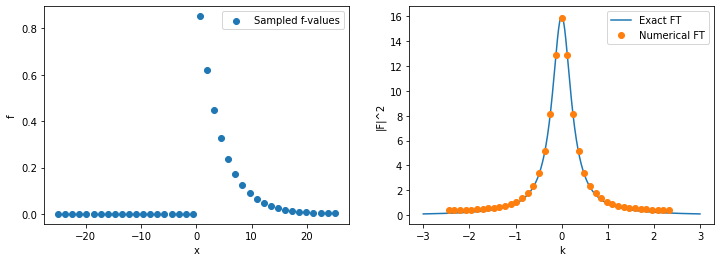

In [3]:
from numpy import linspace, exp, pi
from numpy.fft import fft, fftfreq, fftshift
import matplotlib.pyplot as plt

eta = 0.25

x  = linspace(-25, 25, 40)              # List of N equally-spaced values of x.
dx = x[1] - x[0]                        # The x-spacing
f  = exp(-eta * x); f[x < 0] = 0.       # The values of f(x) at those points.

F  = fft(f)                       # 0. Calculate the DFT of the f array.
k = 2 * pi * fftfreq(len(x), dx)  # 1. Get the values of k
k = fftshift(k)                   # 2. Rearrange the k array
F = fftshift(F)                   # 2. Rearrange the F array
F = dx * F                        # 3. Scale the F array by dx

## Plot f vs x
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(x, f.real, label='Sampled f-values')
plt.xlabel('x'); plt.ylabel('f')
plt.legend()

## Plot the Fourier spectrum, and compare it to the previously-calculated result.
plt.subplot(1,2,2)
k2 = linspace(-3, 3, 500)
F2 = -1j / (k2 - 1j*eta)
plt.plot(k2, abs(F2)**2, label='Exact FT')
plt.plot(k, abs(F)**2, 'o', label='Numerical FT')
plt.xlabel('k'); plt.ylabel('|F|^2')
plt.legend()
plt.show()

## Fourier transforms for time-domain functions<a name="fourier_time"></a>

So far, we have been dealing with functions of a spatial coordinate $x$.  Of course, mathematical relations don't care about what kind of physical variable we are dealing with, so the same equations could be applied to functions of time $t$. However, there is a important difference in *convention*.  When dealing with functions of the time coordinate $t$, it is customary to use a different sign convention in the Fourier relations!

The Fourier relations for a function of time, $f(t)$, are:

>$$\left\{\;\,\begin{align}F(\omega) &= \;\int_{-\infty}^\infty dt\; e^{i\omega t}\, f(t) \\ f(t) &= \int_{-\infty}^\infty \frac{d\omega}{2\pi}\; e^{-i\omega t}\, F(\omega).\end{align}\;\,\right.$$

Compared to the [previously-derived Fourier relations](#fourier_rels) between $f(x)$ and $F(k)$, the signs of the $\pm i \omega t$ exponents are flipped.

There's a good reason for this difference in sign convention: it arises from the need to describe propagating waves, which vary with both space *and* time.  As discussed in [Chapter 5](05_complex_waves.ipynb), a propagating plane wave can be described by a wavefunction of the form

$$f(x,t) = A e^{i(kx - \omega t)},$$

where $k$ is the wave-number and $\omega$ is the angular frequency.  We write the plane wave function this way so that positive $k$ indicates forward propagation in space (i.e., in the $+x$ direction), and positive $\omega$ indicates forward propagation in time (i.e., in the $+t$ direction).  This requires the $kx$ and $\omega t$ terms in the exponent to have opposite signs. Thus, when $t$ increases by some amount, a corresponding *increase* in $x$ leaves the exponent unchanged.

As we have seen, the inverse Fourier transform relation describes how a wave-form is broken up into a superposition of elementary waves.  For a wavefunction $f(x,t)$, the superposition is given in terms of plane waves:

$$f(x,t) = \int_{-\infty}^\infty \frac{dk}{2\pi} \int_{-\infty}^\infty \frac{d\omega}{2\pi}\;\; e^{i(kx-\omega t)}\, F(k,\omega).$$

To be consistent with this, we need to treat space and time variables with oppositely-signed exponents:

$$\begin{align}f(x) &= \int_{-\infty}^\infty \frac{dk}{2\pi}\; e^{ikx}\, F(k) \\ f(t) &= \int_{-\infty}^\infty \frac{d\omega}{2\pi}\; e^{-i\omega t}\, F(\omega).\end{align}$$

The other equations follow similarly.

## Basic properties of the Fourier transform<a name="basic_props"></a>

The Fourier transform has several important properties.  These can all be derived from the definition of the Fourier transform; the proofs are left as exercises.

1. The Fourier transform is linear: if we have two functions $f(x)$ and $g(x)$, whose Fourier transforms are $F(k)$ and $G(k)$ respectively, then for any constants $a, b \in \mathbb{C}$, $$a f(x) + b g(x) \;\;\;  \overset{\mathrm{FT}}{\longrightarrow} \;\;\; a F(k) + b G(k).$$
2. Performing a coordinate translation on a function causes its Fourier transform to be multiplied by a phase factor: $$f(x+b) \;\;\;  \overset{\mathrm{FT}}{\longrightarrow} \;\;\; e^{ikb} \, F(k).$$ As a consequence, translations leave the [Fourier spectrum](#simple_example) $|F(k)|^2$ unchanged.
3. If the Fourier transform of $f(x)$ is $F(k)$, then $$f^*(x) \quad  \overset{\mathrm{FT}}{\longrightarrow} \;\; F^*(-k).$$ As a consequence, the Fourier transform of a real function must satisfy the symmetry relation $F(k) = F^*(-k)$, meaning that the Fourier spectrum is symmetric about the origin in k-space: $\big|\,F(k)\,\big|^2 = \big|\,F(-k)\,\big|^2.$
4. When you take the derivative of a function, that is equivalent to multiplying its Fourier transform by a factor of $ik$: $$\frac{d}{dx} f(x) \,\;\;  \overset{\mathrm{FT}}{\longrightarrow} \;\;\; ik F(k).$$ For functions of time, because of the [difference in sign convention discussed above](#fourier_time), there is an extra minus sign:
$$\frac{d}{dt} f(t) \;\;\;\;  \overset{\mathrm{FT}}{\longrightarrow} \;\;\; -i\omega F(\omega).$$


## Fourier transforms of differential equations

The Fourier transform is a useful tool for solving many [differential equations](01_derivatives.ipynb#ODE).  As an example, consider a [damped harmonic oscillator](04_complex_oscillations.ipynb) subjected to an additional driving force $f(t)$.  This force has an arbitrary time dependence, and is not necessarily harmonic.  The equation of motion is

$$\frac{d^2 x}{dt^2} + 2\gamma \frac{dx}{dt} + \omega_0^2 x(t) = \frac{f(t)}{m}.$$

To solve for $x(t)$, we first take the Fourier transform of both sides of the above equation.  The result is:

$$- \omega^2 X(\omega) - 2 i\gamma \omega X(\omega) + \omega_0^2 X(\omega) = \frac{F(\omega)}{m},$$

where $X(\omega)$ and $F(\omega)$ are the Fourier transforms of $x(t)$ and $f(t)$ respectively. To obtain the left-hand side of this equation, we used the [properties of the Fourier transform described in the previous section](#basic_props), specifically linearity (1) and the Fourier transforms of derivatives (4).  Note also that we are using [the convention for time-domain functions](#fourier_time).

The Fourier transform has turned our ordinary differential equation into an algebraic equation which can be easily solved:

$$X(\omega) = \frac{F(\omega)/m}{- \omega^2 - 2 i\gamma \omega + \omega_0^2}$$

Knowing $X(\omega)$, we can use the inverse Fourier transform to obtain $x(t)$:

$$x(t) = \int_{-\infty}^\infty \frac{d\omega}{2\pi} \, \frac{e^{-i\omega t}\, F(\omega)/m}{- \omega^2 - 2 i\gamma \omega + \omega_0^2}, \;\; \mathrm{where}\;\; F(\omega) = \int_{-\infty}^\infty dt\; e^{i\omega t} f(t).$$

To summarize, the solution procedure for the driven harmonic oscillator equation consists of (i) using the Fourier transform on $f(t)$ to obtain $F(\omega)$, (ii) using the above equation to find $X(\omega)$ algebraically, and (iii) performing an inverse Fourier transform to obtain $x(t)$.  This is the basis for the [Green's function method](10_greens_function.ipynb), a method for systematically solving differential equations that will be discussed in the next chapter.

## Common Fourier transforms

To accumulate more intuition about Fourier transforms, let us examine the Fourier transforms of some interesting functions.  We will just state the results; the calculations are left as exercises.

### Damped waves

[Previously](#simple_example), we saw that an exponentially decay function with decay constant $\eta \in \mathbb{R}^+$ has the following Fourier transform:

$$f(x) = \left\{\begin{array}{cl}e^{-\eta x}, & x \ge 0 \\ 0, & x < 0,\end{array}\right. \;\;  \overset{\mathrm{FT}}{\longrightarrow} \;\; F(k) = \frac{-i}{k-i\eta}.$$

Observe that $F(k)$ is given by a simple algebraic formula. If we "extend" the domain of $k$ to complex values, $F(k)$ corresponds to an analytic function with a [simple pole](08_contour_integration.ipynb#poles) in the upper half of the complex plane, at $k = i\eta$.

Next, consider a decaying wave with wave-number $q \in \mathbb{R}$ and decay constant $\eta \in \mathbb{R}^+$. The Fourier transform is a function with a simple pole at $q + i \eta$:

$$f(x) = \left\{\begin{array}{cl}e^{i (q + i\eta) x}, & x \ge 0 \\ 0, & x < 0.\end{array}\right. \;\;  \overset{\mathrm{FT}}{\longrightarrow} \;\; F(k) = \frac{-i}{k-(q + i\eta)}.$$

In [4]:
## Demo: plot a decaying wave and its Fourier spectrum
%matplotlib inline
from ipywidgets import interact, FloatSlider
from numpy import linspace, exp, pi, zeros
import matplotlib.pyplot as plt

def plot_exp_fourier_1(q, eta):
    ## Plot parameters:
    xmin, xmax = -4., 10.
    fmin, fmax = -1., 1.
    kmin, kmax = -10., 10.
    Fsqmin, Fsqmax = 0, 20
    nx, nk = 200, 500
    arrowdx, arrowy, bardy = 2, 2, 0.2
    col0, col1a, col1b, col2 = "black", "orangered", "darkgreen", "mediumblue"

    ## Plot f(x)
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    ## For x < 0, f(x) = 0:
    plt.plot([xmin, 0, 0], [0, 0, 1], '-',  linewidth=2, color=col1a, label='Re(f)')
    plt.plot([xmin, 0],    [0, 0],    '--', linewidth=2, color=col1b, label='Im(f)')
    ## For x > 0, f(x) = exp(i(q+i*eta)*x)
    x = linspace(0, xmax, nx)
    f = exp(1j * (q + 1j*eta) * x)
    plt.plot(x, f.real, '-',  linewidth=2, color=col1a) # Plot the real part of f(x)
    plt.plot(x, f.imag, '--', linewidth=2, color=col1b) # Plot imaginary part (in same graph)

    plt.title('Graph of f(x)')
    plt.xlabel('x');    plt.xlim(xmin, xmax)
    plt.ylabel('f(x)'); plt.ylim(fmin, fmax)
    plt.legend(loc="upper right")
    
    ## Plot the Fourier spectrum (using exact formula)
    plt.subplot(1,2,2)
    k = linspace(kmin, kmax, nk)
    F = -1j/(k-(q+1j*eta))
    plt.plot(k, abs(F)**2, linewidth=2, color=col2)
    ## Guides to the eye for eta
    y0 = 0.5/eta**2 # Half-maximum
    plt.arrow(q-eta-arrowdx, y0,  arrowdx, 0, color=col0, head_width=0.5, head_length=0.5, length_includes_head=True)
    plt.arrow(q+eta+arrowdx, y0, -arrowdx, 0, color=col0, head_width=0.5, head_length=0.5, length_includes_head=True)
    plt.plot([q-eta, q-eta], [y0-bardy, y0+bardy], color=col0)
    plt.plot([q+eta, q+eta], [y0-bardy, y0+bardy], color=col0)
    plt.text(q + eta + arrowdx + 0.25, y0+bardy, r"$\pm\,\eta$", fontsize=22)
    plt.title('Fourier spectrum')
    plt.xlabel('k');        plt.xlim(kmin, kmax)
    plt.ylabel('|F(x)|^2'); plt.ylim(Fsqmin, Fsqmax)
    plt.show()

interact(plot_exp_fourier_1,
         q   = FloatSlider(min=-5.0, max=5.0, step=0.1, value=1.0, description='q'),
         eta = FloatSlider(min=0.2,  max=1.0, step=0.1, value=0.5, description='eta'));

interactive(children=(FloatSlider(value=1.0, description='q', max=5.0, min=-5.0), FloatSlider(value=0.5, descr…

On the other hand, consider a wave that grows exponentially with $x$ for $x < 0$, and is zero for $x > 0$. The Fourier transform is a function with a simple pole in the lower half-plane:

$$f(x) = \left\{\begin{array}{cl}0, & x \ge 0 \\ e^{i (q - i\eta) x}, & x < 0.\end{array}\right. \;\;  \overset{\mathrm{FT}}{\longrightarrow} \;\; F(k) = \frac{i}{k-(q - i\eta)}.$$

From these examples, we see that oscillations and amplification/decay in $f(x)$ are related to the existence of poles in the algebraic expression for $F(k)$. The real part of the pole position gives the wave-number of the oscillation, and the distance from the pole to the real axis gives the amplification or decay constant.  A decaying signal produces a pole in the upper half-plane, while a signal that is increasing exponentially with $x$ produces a pole in the lower half-plane. In both cases, if we plot the Fourier spectrum of $|F(k)|^2$ versus real $k$, the result is a [Lorentzian](#simple_example) peak centered at $k = q$, with width $2\eta$.

### Gaussian wave-packets<a name="gaussian_FT"></a>

Consider a function with a decay envelope given by a [Gaussian function](02_integrals.ipynb#gaussian_integral):

$$f(x) = e^{iq x} \, e^{-\gamma x^2}, \;\;\;\mathrm{where}\; q \in \mathbb{C},\; \gamma \in \mathbb{R}.$$

This is called a **Gaussian wave-packet**. The width of the envelope is usually characterized by the Gaussian function's **standard deviation**, which is where the curve reaches $e^{-1/2}$ times its peak value.  In this case, the standard deviation is $\Delta x = 1/\sqrt{2\gamma}$.

We will show that $f(x)$ has the following Fourier transform:

$$F(k) = \sqrt{\frac{\pi}{\gamma}} \, e^{-\frac{(k-q)^2}{4\gamma}}.$$

This prediction can be verified numerically, using the [previously-discussed](#DFT) Discrete Fourier Transform method:

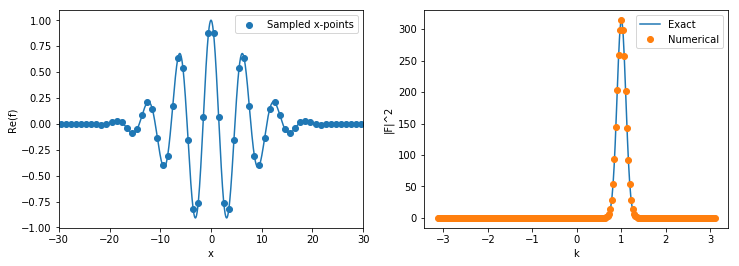

In [73]:
from numpy import linspace, exp, pi
from numpy.fft import fft, fftfreq, fftshift
import matplotlib.pyplot as plt

q     = 1.0
gamma = 0.01

x  = linspace(-100, 100, 200)           # List of N equally-spaced values of x.
dx = x[1] - x[0]                        # The x-spacing
f  = exp(1j*q*x) * exp(-gamma*x**2)     # The corresponding values of f

F = dx * fftshift(fft(f))
k = 2 * pi * fftshift(fftfreq(len(x), dx))

## Plot Re(f) versus x
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
x2 = linspace(x[0], x[-1], 5000)
f2 = exp(1j*q*x2) * exp(-gamma*x2**2)
plt.plot(x2, f2.real)
plt.scatter(x, f.real, label='Sampled x-points')
plt.xlabel('x'); plt.ylabel('Re(f)')
plt.legend()
plt.xlim(-30, 30)

## Plot the Fourier spectrum, and compare it to the prediction
plt.subplot(1,2,2)
k2 = linspace(-3, 3, 500)
F2 = sqrt(pi/gamma) * exp(-(k2-q)**2/4/gamma)
plt.plot(k2, abs(F2)**2, label='Exact')
plt.plot(k, abs(F)**2, 'o', label='Numerical')
plt.xlabel('k'); plt.ylabel('|F|^2')
plt.legend()
plt.show()

To derive this result, we perform the Fourier integral as follows:

$$\begin{align}F(k) &= \int_{-\infty}^\infty dx \, e^{-ikx}\, f(x) \\ &= \int_{-\infty}^\infty dx \, \exp\left\{-i(k-q)x -\gamma x^2\right\}.\end{align}$$

In the integrand, the expression inside the exponential is quadratic in $x$.  We complete the square:

$$\begin{align}F(k) &= \int_{-\infty}^\infty dx \, \exp\left\{-\gamma\left(x + \frac{i(k-q)}{2\gamma}\right)^2 + \gamma\left(\frac{i(k-q)}{2\gamma}\right)^2\right\} \\
&= \exp\left\{ - \frac{(k-q)^2}{4\gamma}\right\}\; \int_{-\infty}^\infty dx \, \exp\left\{-\gamma\left(x + \frac{i(k-q)}{2\gamma}\right)^2\right\}
 \end{align}.$$

The remaining integral is the [Gaussian integral](02_integrals.ipynb#gaussian_integral) with a constant imaginary shift in $x$. By shifting the integration variable, one can show that this is equal the standard Gaussian integral, $\sqrt{\pi/\gamma}$ (the details are left as [an exercise for the reader](#exercises)).  We thus arrive at the result stated above.

The Fourier spectrum, $|F(k)|^2$, is a Gaussian function with standard deviation 

$$\Delta k = \frac{1}{\sqrt{2(1/2\gamma)}} = \sqrt{\gamma}.$$

Once again, the Fourier spectrum is peaked at a value of $k$ corresponding to the wave-number of the underlying sinusoidal wave in $f(x)$, and a stronger (weaker) decay in $f(x)$ leads to a broader (narrower) Fourier spectrum. These features can be observed in the plot below.

In [5]:
## Demo: plot a wavepacket and its Fourier spectrum
%matplotlib inline
from ipywidgets import interact, FloatSlider
from numpy import linspace, pi, zeros, exp, sqrt
import matplotlib.pyplot as plt

def plot_wavepacket_fourier(q, gamma):
    ## Plot parameters:
    xmin, xmax = -5., 5.
    fmin, fmax = -1., 1.
    kmin, kmax = -12., 12.
    Fsqmin, Fsqmax = 0, 15
    nx, nk = 200, 500
    arrowdx, arrowy, bardy = 2, 2, 0.2
    col0, col1a, col1b, col2 = "grey", "orangered", "darkgreen", "mediumblue"

    ## Plot f(x)
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    x = linspace(xmin, xmax, nx)
    f_env = exp(-gamma * x * x)
    f = exp(1j * q * x) * f_env
    plt.plot(x, f_env, '-', linewidth=1, color=col0)   # Plot envelope (in same graph)
    plt.plot(x,-f_env, '-', linewidth=1, color=col0)
    plt.plot(x, f.real, '-',  linewidth=2, color=col1a, label='Re(f)') # real part
    plt.plot(x, f.imag, '--', linewidth=2, color=col1b, label='Im(f)') # imag part
    plt.title('Graph of f(x)')
    plt.xlabel('x');    plt.xlim(xmin, xmax)
    plt.ylabel('f(x)'); plt.ylim(fmin, fmax)
    plt.legend(loc="upper right")
    
    ## Plot the Fourier spectrum (using exact formula)
    plt.subplot(1,2,2)
    k = linspace(kmin, kmax, nk)
    F = sqrt(pi/gamma) * exp(-0.25*(k-q)**2/gamma)
    plt.plot(k, abs(F)**2, linewidth=2, color=col2)
    plt.title('Fourier spectrum')
    plt.xlabel('k');        plt.xlim(kmin, kmax)
    plt.ylabel('|F(x)|^2'); plt.ylim(Fsqmin, Fsqmax)
    plt.show()

interact(plot_wavepacket_fourier,
         q   = FloatSlider(min=-10.0, max=10.0, step=0.1, value=5.0, description='q'),
         gamma = FloatSlider(min=0.1,  max=2.0, step=0.1, value=0.5, description='gamma'));

interactive(children=(FloatSlider(value=5.0, description='q', max=10.0, min=-10.0), FloatSlider(value=0.5, des…

## The delta function<a name="delta_function"></a>

What happens when we feed the Fourier relations into one another?  Plugging the Fourier transform into the inverse Fourier transform, we get

$$\begin{align}f(x) &= \int_{-\infty}^\infty \frac{dk}{2\pi} \, e^{ikx} F(k) \\
&= \int_{-\infty}^\infty \frac{dk}{2\pi} \, e^{ikx} \int_{-\infty}^\infty dx' e^{-ikx'} f(x')\\
&= \int_{-\infty}^\infty dx' \int_{-\infty}^\infty \frac{dk}{2\pi} \, e^{ikx}  e^{-ikx'} f(x')\\
&= \int_{-\infty}^\infty  dx' \; \delta(x-x')\, f(x'),\end{align}$$

In the last step, we have introduced

$$\delta(x-x') = \int_{-\infty}^\infty \frac{dk}{2\pi} \, e^{ik(x-x')},$$

which is called the **delta function**.  According to the above equations, the delta function acts as a kind of filter: when we multiply it by any function $f(x')$ and integrate over $x'$, the result is the value of that function at a particular point $x$.

But here's a problem: the above integral definition of the delta function is non-convergent; in particular, the integrand does not vanish at $\pm \infty$.  We can get around this by thinking of the delta function as a limiting case of a convergent integral.  Specifically, let's take

$$\delta(x-x') = \lim_{\gamma \rightarrow 0} \, \int_{-\infty}^\infty \frac{dk}{2\pi} \, e^{ik(x-x')} \, e^{-\gamma k^2}.$$

For $\gamma \rightarrow 0$, the "regulator" $\exp(-\gamma k^2)$ which we have inserted into the integrand goes to one, so that the integrand goes back to what we had before; on the other hand, for $\gamma > 0$ the regulator ensures that the integrand vanishes at the end-points so that the integral is well-defined.  But the expression on the right is the [Fourier transform for a Gaussian wave-packet](#gaussian_FT), so

$$\delta(x-x') = \lim_{\gamma \rightarrow 0} \; \frac{1}{\sqrt{4\pi\gamma}} \, e^{-\frac{(x-x')^2}{4\gamma}}.$$

This is a [Gaussian function](02_integrals.ipynb#gaussian_integral) of width $\sqrt{2\gamma}$ and area $1$.  Hence, the delta function can be regarded as the limit of a Gaussian function as its width goes to zero while keeping the area under the curve fixed at unity (which means the height of the peak goes to infinity).

The most important feature of the delta function is it acts like a filter. Whenever it shows up in an integral, it picks out the value of the rest of the integrand evaluated where the delta function is centered:

$$\int_{-\infty}^\infty  dx \; \delta(x-x_0)\, f(x) = f(x_0).$$

Intuitively, we can understand this behavior from the above definition of the delta function as the zero-width limit of a Gaussian.  When we multiply a function $f(x)$ with a narrow Gaussian centered at $x_0$, the product will approach zero almost everywhere, because the Gaussian goes to zero.  The product is non-zero only in the vicinity of $x = x_0$, where the Gaussian peaks. And because the area under the delta function is unity, integrating that product over all $x$ simply gives the value of the other function at the point $x_0$.

<table width="75%" style="font-size: 100%; border: 1px solid gray;">
<tr><td style="text-align:left"><strong>Note</strong></td></tr>
<tr><td style="text-align:left">In physics, the delta function is commonly used to represent the density distributions of **point particles**. For instance, the distribution of mass within an object can be represented by a mass density function.  Assuming one-dimensional space for simplicity, we define the mass density $\rho(x)$ as the mass per unit length at position $x$. By this definition,<br/>$$M = \int_{-\infty}^\infty \rho(x)\, dx$$<br/>is the total mass of the object.  Now suppose the mass is distributed among $N$ point particles, which are located at distinct positions $x_1$, $x_2$, ..., $x_N$, and have masses $m_1$, $m_2$, ... $m_N$.  To describe this situation, we can write the mass density function as<br/>$$\rho(x) = \sum_{j=1}^N \, m_j\, \delta(x-x_j).$$<br/>The reason for this is that if we integrate $\rho(x)$ around the vicinity of the $j$-th particle, the result is just the mass of that single particle, thanks to the features of the delta function:<br/>$$\begin{aligned}\lim_{\varepsilon\rightarrow 0^+}\, \int_{x_j - \varepsilon}^{x_j + \varepsilon} \rho(x) \, dx &= \sum_{i=1}^N m_i\; \Big[\lim_{\varepsilon\rightarrow 0^+}\, \int_{x_j - \varepsilon}^{x_j + \varepsilon} \delta(x-x_i) \,dx\Big]\\ &= \sum_{i=1}^N m_i\; \delta_{ij} \\ &= m_j.\end{aligned}$$<br/>Likewise, integrating $\rho(x)$ over all space gives the total mass $m_1 + m_2 + \cdots + m_N$.
</td></tr></table>


## Multi-dimensional Fourier transforms*<a name="multidim"></a>
*(&ast; Optional topic)*

When studying problems such as wave propagation, we often deal with Fourier transforms of several variables.  This is conceptually straightforward.  For a function $f(x_1, x_2, \dots, x_d)$ which depends on $d$ independent spatial coordinates $x_1, x_2, \dots x_d$, we can Fourier transform each coordinate individually:

$$F(k_1, k_2, \dots, k_d) = \int_{-\infty}^\infty dx_1\; e^{-ik_1x_1}\; \int_{-\infty}^\infty dx_2\; e^{-ik_2x_2}\,\cdots\, \int_{-\infty}^\infty dx_d\; e^{-ik_d x_d}\, f(x_1,x_2, \dots,x_N)$$

Each coordinate gets Fourier-transformed into its own independent $k$ variable, so the result is also a function of $d$ independent variables.

We can express the multi-dimensional Fourier transform more compactly using vector notation.  If $\vec{x}$ is a $d$-dimensional coordinate vector, the Fourier-transformed coordinates can be written as $\vec{k}$, and the Fourier transform is

$$F(\vec{k}) = \int d^d x \; \exp\left(-i\,\vec{k}\cdot\vec{x}\right) \, f\big(\vec{x}\big),$$

where $\int d^d x$ denotes an integral over the entire $d$-dimensional space, and  $\vec{k}\cdot\vec{x}$ is the usual dot product of two vectors.  The inverse Fourier transform is

$$f(\vec{x}) = \int \frac{d^dk}{(2\pi)^d}\; \exp\left(i\,\vec{k}\cdot\vec{x}\right)\, F\big(\vec{k}\big).$$

The [delta function](#delta_function) can also be defined in $d$-dimensional space, as the Fourier transform of a plane wave:

$$\delta^d(\vec{x}-\vec{x}') = \int \frac{d^dk}{(2\pi)^d} \, \exp\left[i\vec{k} \cdot \left(\vec{x}-\vec{x}'\right)\right].$$

Note that $\delta^d$ has the dimensions of $[x]^{-d}$.  The multi-dimensional delta function has a "filtering" property similar to the [one-dimensional delta function](#delta_function). For any $f(x_1,\dots,x_d)$,

$$\int d^dx \; \delta^d(\vec{x}-\vec{x}') \, f(\vec{x}) = f(\vec{x}').$$

## Exercises<a name="exercises"></a>

1. Find the relationship between the coefficients $\{\alpha_n, \beta_m\}$ in the sine/cosine Fourier series and the coefficients $f_n$ in the complex exponential Fourier series:$$\begin{aligned}f(x) &= \sum_{n=1}^\infty \alpha_n \sin\left(\frac{2\pi n x}{a}\right) + \sum_{m=0}^\infty \beta_m \cos\left(\frac{2 \pi m x}{a}\right) \\ &= \sum_{n=-\infty}^\infty f_n \exp\left(\frac{2\pi i n x}{a}\right).\end{aligned}$$
2. Consider the triangular wave$$f(x) = \left\{\begin{array}{rr}- x, &-a/2 \le x < 0, \\ x, & 0 \le x < a/2\end{array}\right.$$ 
    1. Derive the Fourier series expansion.
    2. In the incomplete Python program below, write the necessary code for plotting this Fourier series.
3. A periodic function $f(x)$ (with period $a$) is written as a complex Fourier series with coefficients $\{f_0, f_{\pm1}, f_{\pm2}, \dots\}$. Determine the relationship(s) between the Fourier coefficients under each of the following scenarios:
    1. $f(x)$ is real for all $x$.
    2. $f(x) = f(-x)$ for all $x$
    3. $f(x) = f(-x)^*$ for all $x$.<br/>
   [(Solution)](11_solutions.ipynb#09_03)
4. Prove the properties of the Fourier transform listed in the [Basic Properties](#basic_props) section.
5. Find the Fourier transform of $f(x) = \sin(\kappa x)/x.$
6. Prove that if $f(x)$ is a real function, then its Fourier transform satisfies $F(k) = F(-k)^*$.
7. Prove that $$\delta(ax) = \frac{1}{a}\,\delta(x),$$ where $a$ is any nonzero real number. [(Solution)](11_solutions.ipynb#09_07)
8. Calculate $$\int_{-\infty}^\infty dx \int_{-\infty}^\infty dy \; x^2\, \delta\left(\sqrt{x^2+y^2}-a\right),$$ where $a$ is a real number. [(Solution)](11_solutions.ipynb#09_08)
9. Consider the integral $$I = \int_{-\infty}^\infty e^{-\gamma\left(x + i\lambda\right)^2} \; dx,$$ where $\gamma \in \mathbb{R}^+$ and $\lambda \in \mathbb{R}.$ (This is the Gaussian integral with an imaginary displacement in the integration variable, which we encountered while discussing [Gaussian wavepackets](#gaussian_FT).) To solve this integral, consult the contour shown in the figure below (for the case $\lambda > 0$). Show, by parameterization, that (i) $I = - \lim_{L\rightarrow \infty} \int_{\Gamma_3} e^{-\gamma z^2} dz$, and that (ii) $\lim_{L\rightarrow \infty} \int_{\Gamma_2~\text{or}~\Gamma_4} e^{-\gamma z^2}\, dz  = 0.$ Hence, explain why $I = \sqrt{\pi/\gamma}.$
<img src="img/rectangular_contour.png" alt="Contour used to solve the complex Gaussian contour.">

In [1]:
## Here is the incomplete Python program for Problem 2:
    
%matplotlib inline
from ipywidgets import interact, IntSlider, FloatSlider
from numpy import *
import matplotlib.pyplot as plt

## Plot a triangular wave of period 'a', as well as
## the Fourier series up to order 'N'.
def plot_triangular_wave_series(N, a):
    np = 2                                # Number of periods to plot on each side of x = 0
    xmin, xmax = (-np-0.5)*a, (np+0.5)*a  # x-axis limits of the plot
    ymin, ymax = 0.0, 0.6*a               # y-axis limits of the plot
    nx = 600                              # Number of x-points in the Fourier series plot
    col1, col2 = "darkorange", "mediumblue"

    plt.figure(figsize=(10,5))
    ## Plot the triangular wave
    plt.plot([], [], linewidth=3, color=col1, label="Triangular wave")
    for n in range(-np, np+1):
        x = array([-0.5*a, 0, 0.5*a])
        y = array([0.5*a, 0, 0.5*a])
        plt.plot(x-n*a, y, linewidth=2, color=col1)
        
    ## Plot the Fourier series approximant.
    x = linspace(xmin, xmax, nx)
    f = zeros(nx)
    ############### [[ Code for calculating f goes here ]] ###############

    ## plt.plot(x, f, linewidth=1, color=col2, label="Series")
    
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Fourier series of triangular wave, to order {}'.format(N)) 
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.legend(loc="upper right")

interact(plot_triangular_wave_series,
         N = IntSlider(min=1, max=25, step=1, value=1, description='n_max'),
         a = FloatSlider(min=0.5, max=4.0, step=0.1, value=1.0, description='a'));

interactive(children=(IntSlider(value=1, description='n_max', max=25, min=1), FloatSlider(value=1.0, descripti…